In [20]:
## inspired by Siraj Raval：https://www.youtube.com/watch?v=05NqKJ0v7EE

from dqn_agent import Agent
from model import QNetwork
import matplotlib.pyplot as plt
import numpy as np
import torch
from collections import deque
import pandas as pd
from tqdm import tqdm

STATE_SIZE = 20
EPISODE_COUNT = 1000

# 计算等效成本
def cost_calculate(current_cost, money, pos_new, share):
    if share == 0:
        cost = current_cost
    else:
        cost = money * pos_new / share
    return cost

# 计算总资产
def money_calculate(money, share, current_cost, pos):
    return share * current_cost + money * (1 - pos)

def dqn(n_episodes=EPISODE_COUNT, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    for _ in tqdm(range(1,n_episodes+1)):
        # print("Episode" + str(i_episode))
        state = getState(stockData, 0, STATE_SIZE + 1)
        pos_old = 0 #初始化持仓
        money_initial = 10000 # 初始化资金
        money = money_initial
        cost = 0 # 初始化等效成本
        # total_profit = 0
        total_share = 0 # 初始化持股
        agent.balance = []

        reward = 0
        for t in range(l):
            action = agent.act(state, eps)
            next_state = getState(stockData, t + 1, STATE_SIZE + 1)
            # reward = 0

            if action == 1:# 加仓20%
                #agent.inventory.append(stockData[t])
                #print("buy" + str(stockData[t]))
                pos_new = min(pos_old + 0.2, 1)
                total_share += money * (pos_new - pos_old) / stockData[t]

            elif action == 2:# 减仓20%
                #bought_price = agent.inventory.pop(0)
                pos_new = max(pos_old - 0.2, 0)
                total_share += money * (pos_new - pos_old) / stockData[t]


                # reward = max(stockData[t] - bought_price, 0)
                # reward = stockData[t] - cost
                # print("Sell: " + str(stockData[t]) + " | Profit: " + str(stockData[t] - bought_price))
            else: # 持仓
                pos_new = pos_old


            # cost = cost_calculate(stockData[t], money, pos_new, total_share)
            money = money_calculate(money, total_share, stockData[t], pos_new)
            
            
            
            
            if money < 0 or t == l - 1:
                done = 1
            else:
                done = 0
            reward = (money - money_initial) / money_initial
            agent.step(state, action, reward, next_state, done)
            eps = max(eps_end, eps * eps_decay)
            state = next_state
            pos_old = pos_new


            if done:
                break
        scores.append((money - money_initial) / money_initial)
        scores_window.append((money - money_initial) / money_initial)
        if np.mean(scores_window) > 0.2 and len(scores_window) == 100:
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_000997.pth')
            break
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_000997.pth')
    return scores


def getState(data, t, n):
    d = t - n
    block = data[d:t] if d >= 0 else -d * [data[0]] + data[0:t]
    res = []
    for i in range(n - 1):
        res.append(block[i + 1] - block[i])
    return np.array([res])


In [21]:
data_dir = "StockData"
filename = "600967.SS.csv"
file_dir = data_dir + "/" + filename

# 使用 pandas 读取 CSV 文件
try:
    df = pd.read_csv(file_dir, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_dir, encoding='gbk')
    except UnicodeDecodeError:
        df = pd.read_csv(file_dir, encoding='iso-8859-1')

# 提取收盘价
stockData = list(df['Close'].values)


agent = Agent(state_size=STATE_SIZE, action_size=3)
l = len(stockData) - 1

scores = dqn()



 52%|█████▏    | 520/1000 [01:02<00:58,  8.26it/s]


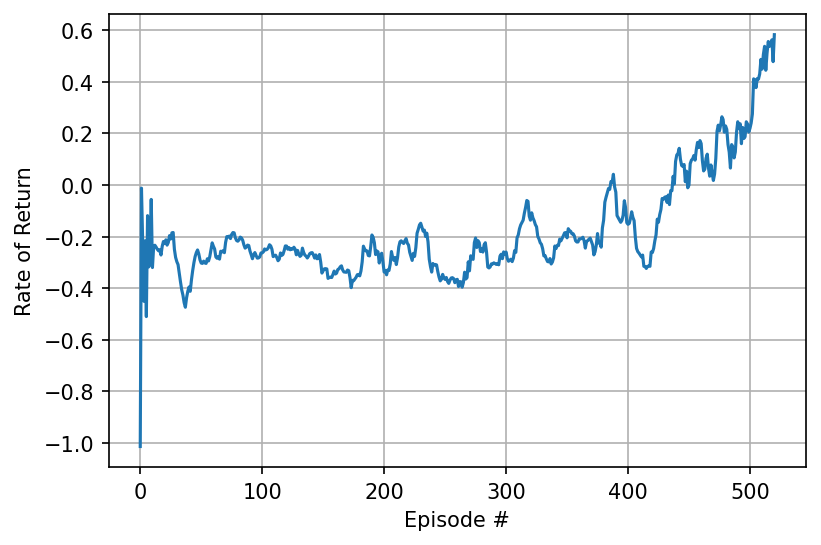

In [22]:
#smooth the curve
set_num =10
scores_smooth = []
for i in range(len(scores)):
    if i < set_num:
        scores_smooth.append(scores[i])
    else:
        scores_smooth.append(np.mean(scores[i - set_num:i]))

# plot the scores
fig = plt.figure(dpi=150)
plt.plot(np.arange(len(scores_smooth)), scores_smooth)
plt.ylabel('Rate of Return')
plt.xlabel('Episode #')
plt.grid("on")
plt.show()